## Final Project Submission

Please fill out:
* Student name: Morgan Fell
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Mark Bourbor
* Blog post URL:


# Microsoft Movie Studio

## Overview

Analysis of movie data from IMDB, BoxOffice Mojo, TMDB, and The Numbers provided metrics on the strategic entrance of Microsoft into the entertainment industry. The data provided has been selected based on movies released in the last ten years with high popularity amongst audiences. The return on investment (RoI), studio profits, timing of release, and the correlation between runtime and genre ranking were used to make the best recommendations possible. The Walt-Disney-Fox conglomerate shows the highest studio profits, which opened the idea of Microsoft using the same business model they Disney has pursued. We've also noted Drama, Comedy, and Biographies to be genres that require a lower production budget resulting in a higher RoI. A fall release, specifically November, draws the highest profit; however, the length of the movie can influence the rating amongst fans. 

## Business Understanding

The gateway to Microsoft successfully launching original content from their own entertainment studio relys on answering the following questions:
1. Which genres provide the largest return on investment?
2. How does the studio distributing the movie and the time of year it is released alter boxoffice performance?
3. Does the runtime of a film influence the popularity?

## Data Understanding
Large datasets from four major entermainment review websites were used to create a hollistic understanding. All of the tools required to filter, join, and visualize the sets are seen below. 

In [48]:
# All required tools were imported into the notebook
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [49]:
#A connection to the SQL database is established
conn = sqlite3.connect('im.db.sqlite')

### IMDb
The Internet Movie Database(IMDb) is a website that provides information about movies, television shows, and other forms of entertainment. It includes a database of titles, cast and crew members, plot summaries, ratings, and reviews. IMDb also features news and information about the entertainment industry, as well as a section for trailers and other video content. The website is owned by Amazon and is one of the most popular resources for information about movies and television shows. It is used by both industry professionals and general audiences. I will be joining the movie_ratings and movie_basics using the shared column 'movie_id' with a filter for no ratings below 7.5 and at least 3500 votes contibuting to the rating. 

In [50]:
#Importing the zipped IMDb data
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

In [51]:
#Importing tool that allows SQL commands in python
from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals())

In [52]:
#Function built to notify if zipped files have been loaded
from os.path import exists
file_exists = exists('zippedData/im.db')
if file_exists:
    print('Success!')
else:
    print('''
          Try Again.
          ''')

Success!


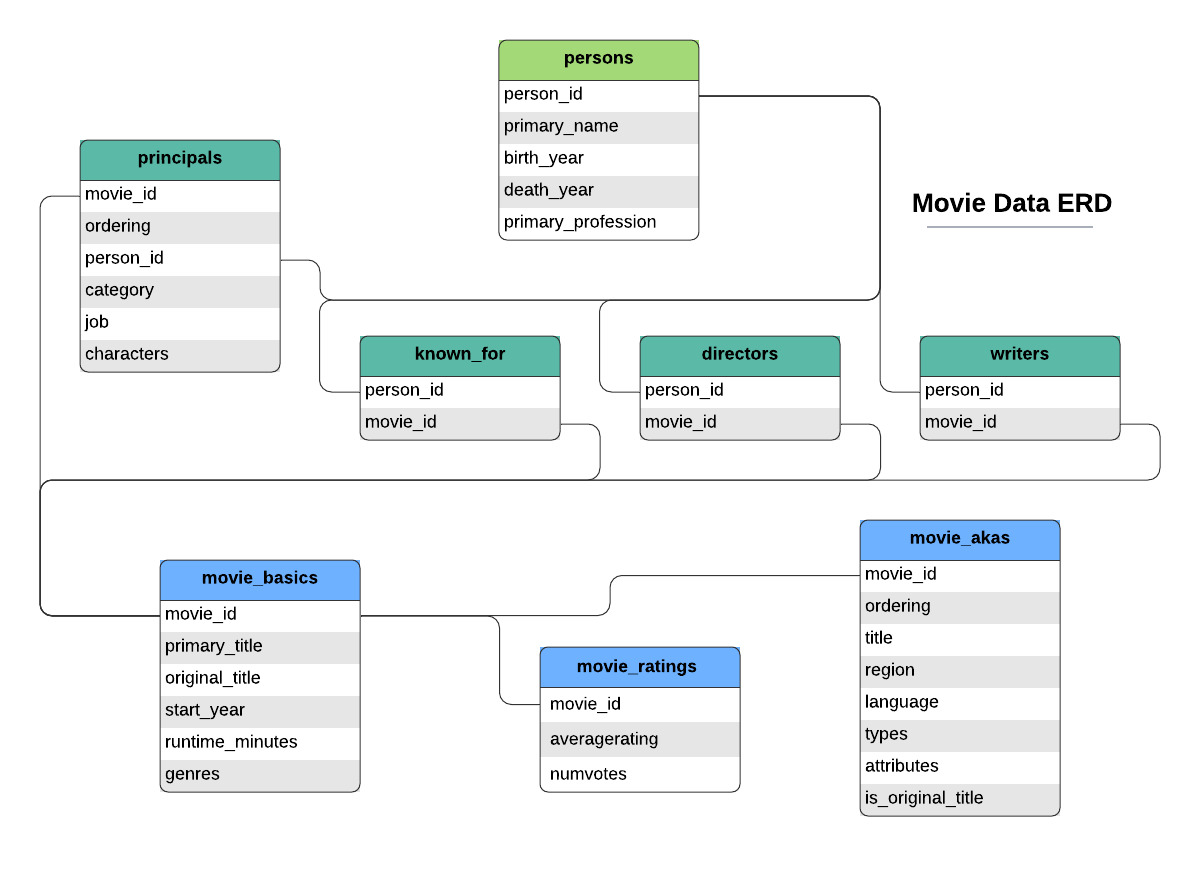

In [53]:
#Connecting to the specific SQL Movie Data ERD set and printing the list of tables present 
conn = sqlite3.connect('zippedData/im.db')
query = """  SELECT * FROM sqlite_master  """
tables = pd.read_sql(query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [54]:
#query for opening the movie_ratings table
q2 = """SELECT * FROM movie_ratings"""
imdb_movie_ratings = pd.read_sql(q2, conn)
imdb_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [55]:
#Datatypes and size 
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [56]:
#query for opening movie_basics table
q3 = """SELECT * FROM movie_basics"""
imdb_movie_basics = pd.read_sql(q3, conn)
imdb_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [57]:
#Datatypes and size
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


### The Movie Database (TMDb)
The TMDb (The Movie Database) is a community-driven movie and television show database. It is similar to IMDb in that it provides information about movies, television shows, and other forms of entertainment, including cast and crew lists, plot summaries, and ratings. However, TMDb is a non-profit organization and relies on contributions from its community of users to provide accurate and up-to-date information. In addition to its database, TMDb also offers a API (Application Programming Interface) that allows developers to access its data for use in other applications. TMDb is widely used by media professionals and enthusiasts as a resource for information about the entertainment industry. The genre_ids will be converted to text in separate rows so find the average audience rating of movies in the last ten years.

In [58]:
#Opening CSV file with dat formating
tmdb_df_og = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col = 0, 
                      parse_dates=['release_date'])
tmdb_df_og

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [59]:
#Datatypes and size
tmdb_df_og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


### The Numbers 
The Numbers is a website that provides financial data and analysis on the film and television industries. It includes information about box office revenues, budgets, production costs, and other financial metrics for movies and television shows. The website also offers analysis and reports on trends and performance in the entertainment industry. The Numbers is a useful resource for industry professionals, investors, and other interested parties looking for detailed financial information about the film and television industries. It is updated regularly with the latest data and analysis. The csv file will be filtered for movies in the last ten years. A calculation will produce a new column for the percent return on investment. Finally, it will be joined to the already combined SQL tables, movie_ratings and movie_basics

In [60]:
#Opening csv file with date formating
df_budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz', index_col = 0,
                     parse_dates=['release_date'])
df_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,2018-12-31,Red 11,"$7,000",$0,$0
79,1999-04-02,Following,"$6,000","$48,482","$240,495"
80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [61]:
#Datatypes and size
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   object        
 3   domestic_gross     5782 non-null   object        
 4   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 271.0+ KB


### BoxOffice Mojo
Box Office Mojo is a website that provides detailed box office data for movies and other forms of entertainment. It tracks ticket sales for movies released in theaters, as well as home video and digital sales. The website also offers information on movie budgets and production costs, as well as analysis and reports on industry trends and performance. Box Office Mojo is a valuable resource for industry professionals, investors, and anyone interested in the financial performance of movies and other forms of entertainment. It is updated regularly with the latest box office data. This csv file will be used to report studio profits for movies in the last year that meet at least the average domestic gross and total profits. Upon further research into the entertainment industry, a new column for parent studios was added. 

In [62]:
#Opening csv file
df_mojo = pd.read_csv('./zippedData/bom.movie_gross.csv.gz', index_col = 0)
df_mojo.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [63]:
#Datatypes and size
df_mojo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


# Methods
A consistent filtering system is used to bring each database to focus on movies released from 2012-2022 that received at least the average rating of that set. BoxOffice Mojo is the only dataset where an audience ranking was not filtered. A massive dataframe was created after joining the IMDb movie_ratings and movie_basics to The Numbers's dataset. A RoI column and date filtered to only include the month of movie release created the dataset with a limit of only the top 500 films used for visualization. The average number of films for each genre was 12.89. This created the need to only include genres who met at least that average when generating the visual. Genres such as music and musical were checked to see if they should be combined. After reviewing the films in each category, I determined there was not a need as films within the music genre geniually related to films about the music industry. 

BoxOffice Mojo required numerous null values to be dropped, as well as filtering out films who were below the average domestic gross. A new column was created to represent the total profits from the domestic and foreign gross values. An average profit was calculated for each studio. Cross-referencing was required to ensure duplicate studios were combined, such as Lionsgate Films and Lionsgate Studio. I did choose the leave WB (NL) as as separate category because while New Line Cinema is owned by Warner Brothers, New Line is viewed as its own studio. 

The Movie Database (TMDb) required switching out numeric genre keys with text. Characters surrounding the numerical values, such as [] needed to be removed for this to happen. Just as I did with the IMDb data, the genres were split out into separate rows to allow for easier mathmatical analysis. TmDb was used to get a pulse on audience popularity so that we were not only relying on monetary information.

### IMDB Cleaning

In [64]:
#Calculating the average votes and maximum number of votes to create a filter point
avg_votes = pd.read_sql("""SELECT AVG(numvotes) AS avg_votes, MAX(numvotes) AS max_votes FROM movie_ratings;""", conn)
avg_votes

,avg_votes,max_votes
0,3523.662167,1841066


In [65]:
#Joining movie_ratings with movie_basics using the limits of needing at least 3500 votes and an average rating of 7.5 based on the values from above
q4 = """
    SELECT * 
    FROM movie_ratings
    JOIN movie_basics USING(movie_id)
    WHERE numvotes >= 3500 AND averagerating >= 7.5 
    ORDER BY averagerating DESC
""" 
df_imdb = pd.read_sql(q4, conn)

#The original_title column is unnecessary given the primary_title
df_imdb.drop(['original_title'], axis=1)

,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
0,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama"
1,tt5963218,9.5,6509,Aloko Udapadi,2017,113.0,"Drama,History"
2,tt7738784,9.4,9629,Peranbu,2018,147.0,Drama
3,tt5813916,9.3,100568,The Mountain II,2016,135.0,"Action,Drama,War"
4,tt5354160,9.3,18470,Aynabaji,2016,147.0,"Crime,Mystery,Thriller"
...,...,...,...,...,...,...,...
726,tt1438298,7.5,15402,Guzaarish,2010,126.0,Drama
727,tt1798243,7.5,16303,Rudderless,2014,105.0,"Comedy,Drama,Music"
728,tt3808342,7.5,39232,Son of Saul,2015,107.0,"Drama,War"
729,tt4425200,7.5,290053,John Wick: Chapter 2,2017,122.0,"Action,Crime,Thriller"


In [66]:
#"apply" function and a lambda function split the values in the "genres" column of the data frame by a comma and assign the resulting list to the "genres" column.
df_imdb['genres'] = df_imdb['genres'].apply(lambda x: x.split(','))
#"explode" function to create a new row for each value in the "genres" column
df_imdb = df_imdb.explode('genres')
#Display dataframe
df_imdb

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,Comedy
0,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,Drama
1,tt5963218,9.5,6509,Aloko Udapadi,Aloko Udapadi,2017,113.0,Drama
1,tt5963218,9.5,6509,Aloko Udapadi,Aloko Udapadi,2017,113.0,History
2,tt7738784,9.4,9629,Peranbu,Peranbu,2018,147.0,Drama
...,...,...,...,...,...,...,...,...
729,tt4425200,7.5,290053,John Wick: Chapter 2,John Wick: Chapter 2,2017,122.0,Crime
729,tt4425200,7.5,290053,John Wick: Chapter 2,John Wick: Chapter 2,2017,122.0,Thriller
730,tt2532528,7.5,8700,Dirty Wars,Dirty Wars,2013,87.0,Crime
730,tt2532528,7.5,8700,Dirty Wars,Dirty Wars,2013,87.0,Documentary


In [67]:
#Calculates the number of movies in each genre
df_imdb.genres.value_counts()

Drama          457
Action         160
Comedy         149
Documentary    136
Biography      106
Crime          101
Adventure       99
Thriller        95
Romance         80
Animation       57
History         54
Mystery         51
Music           38
Sci-Fi          33
Fantasy         31
Family          25
Sport           25
War             24
Horror          13
Musical          7
News             5
Western          3
Name: genres, dtype: int64

### The Numbers Cleaning

In [68]:
#Null values were dropped from the data table
df_budgets.dropna()
#We want to know how well the movie performed in every country it was released in so we will drop the domestic_gross
df_budgets_clean = df_budgets.drop('domestic_gross', axis=1)
df_budgets_clean

,release_date,movie,production_budget,worldwide_gross
id,,,,
1,2009-12-18,Avatar,"$425,000,000","$2,776,345,279"
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
3,2019-06-07,Dark Phoenix,"$350,000,000","$149,762,350"
4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...,...
78,2018-12-31,Red 11,"$7,000",$0
79,1999-04-02,Following,"$6,000","$240,495"
80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338"


In [69]:
#Defining a function called "convert_monies" that takes in a data frame and a column name as arguments. The function converts the values in the specified column from strings to numeric values by removing commas and dollar signs. The function then returns the modified data frame.
def convert_monies(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(",", "").str.replace("$", ""))
    
    return df
#Function used to convert two columns from strings to numerics
convert_monies(df_budgets_clean, 'production_budget')
convert_monies(df_budgets_clean, 'worldwide_gross')

,release_date,movie,production_budget,worldwide_gross
id,,,,
1,2009-12-18,Avatar,425000000,2776345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
3,2019-06-07,Dark Phoenix,350000000,149762350
4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
78,2018-12-31,Red 11,7000,0
79,1999-04-02,Following,6000,240495
80,2005-07-13,Return to the Land of Wonders,5000,1338


In [70]:
#Any rows with zero dollar worldwide gross is removed from dataframe
df_tn_clean = df_budgets_clean[df_budgets_clean["worldwide_gross"] != 0]
df_tn_clean

,release_date,movie,production_budget,worldwide_gross
id,,,,
1,2009-12-18,Avatar,425000000,2776345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
3,2019-06-07,Dark Phoenix,350000000,149762350
4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
76,2006-05-26,Cavite,7000,71644
77,2004-12-31,The Mongol King,7000,900
79,1999-04-02,Following,6000,240495


In [71]:
#The release_date had to be converted from the nano-second [ns] based format in order to filter movies only from the last 10 years
df_tn_clean = df_tn_clean[(df_tn_clean['release_date'] >= '2012-01-01')]
df_tn_clean

,release_date,movie,production_budget,worldwide_gross
id,,,,
3,2019-06-07,Dark Phoenix,350000000,149762350
4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220
7,2018-04-27,Avengers: Infinity War,300000000,2048134200
...,...,...,...,...
20,2015-07-31,Counting,50000,8374
38,2016-03-18,Krisha,30000,144822
45,2017-01-27,Emily,27000,3547


In [72]:
#The worldwide_gross column is sorted from highest to lowest with a limit of 500 to give us the top 500 performing movies over the last 10 years
df_tn_filtered = df_tn_clean.sort_values(by='worldwide_gross', ascending=False)[:500]
df_tn_filtered

,release_date,movie,production_budget,worldwide_gross
id,,,,
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220
7,2018-04-27,Avengers: Infinity War,300000000,2048134200
34,2015-06-12,Jurassic World,215000000,1648854864
67,2015-04-03,Furious 7,190000000,1518722794
27,2012-05-04,The Avengers,225000000,1517935897
...,...,...,...,...
63,2018-10-12,Goosebumps 2: Haunted Halloween,35000000,93291478
21,2018-08-10,BlacKkKlansman,15000000,93017335
77,2016-03-25,My Big Fat Greek Wedding 2,18000000,92096558


In [73]:
#The return on invest was calculated by dividing the value in worldwide_gross by the production_budget. This is then converted to a percent by multipling by 100.
df_tn_filtered["RoI"] = ((df_tn_filtered['worldwide_gross'] - df_tn_filtered['production_budget'])/df_tn_filtered['production_budget']) * 100
df_tn_filtered

,release_date,movie,production_budget,worldwide_gross,RoI
id,,,,,
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,571.016739
7,2018-04-27,Avengers: Infinity War,300000000,2048134200,582.711400
34,2015-06-12,Jurassic World,215000000,1648854864,666.909239
67,2015-04-03,Furious 7,190000000,1518722794,699.327786
27,2012-05-04,The Avengers,225000000,1517935897,574.638176
...,...,...,...,...,...
63,2018-10-12,Goosebumps 2: Haunted Halloween,35000000,93291478,166.547080
21,2018-08-10,BlacKkKlansman,15000000,93017335,520.115567
77,2016-03-25,My Big Fat Greek Wedding 2,18000000,92096558,411.647544


In [74]:
#A new column showing only the month is generated to visualize the best time of year to release a movie
df_tn_filtered['mm'] = pd.to_datetime(df_tn_filtered['release_date']).dt.strftime('%m')
df_tn_filtered

,release_date,movie,production_budget,worldwide_gross,RoI,mm
id,,,,,,
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,571.016739,12
7,2018-04-27,Avengers: Infinity War,300000000,2048134200,582.711400,04
34,2015-06-12,Jurassic World,215000000,1648854864,666.909239,06
67,2015-04-03,Furious 7,190000000,1518722794,699.327786,04
27,2012-05-04,The Avengers,225000000,1517935897,574.638176,05
...,...,...,...,...,...,...
63,2018-10-12,Goosebumps 2: Haunted Halloween,35000000,93291478,166.547080,10
21,2018-08-10,BlacKkKlansman,15000000,93017335,520.115567,08
77,2016-03-25,My Big Fat Greek Wedding 2,18000000,92096558,411.647544,03


In [75]:
#creates a new data frame called "mass_df" by performing a join on the "movie" column of "df_tn_filtered" and the "original_title" column of "df_imdb". The "how" parameter is set to "inner", which means that only rows that match in both data frames will be included in the resulting data frame.
mass_df = df_tn_filtered.join(df_imdb.set_index('original_title'), on='movie', how='inner')
mass_df

,release_date,movie,production_budget,worldwide_gross,RoI,mm,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
id,,,,,,,,,,,,,
7,2018-04-27,Avengers: Infinity War,300000000,2048134200,582.711400,04,tt4154756,8.5,670926,Avengers: Infinity War,2018,149.0,Action
7,2018-04-27,Avengers: Infinity War,300000000,2048134200,582.711400,04,tt4154756,8.5,670926,Avengers: Infinity War,2018,149.0,Adventure
7,2018-04-27,Avengers: Infinity War,300000000,2048134200,582.711400,04,tt4154756,8.5,670926,Avengers: Infinity War,2018,149.0,Sci-Fi
27,2012-05-04,The Avengers,225000000,1517935897,574.638176,05,tt0848228,8.1,1183655,The Avengers,2012,143.0,Action
27,2012-05-04,The Avengers,225000000,1517935897,574.638176,05,tt0848228,8.1,1183655,The Avengers,2012,143.0,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,2018-08-10,BlacKkKlansman,15000000,93017335,520.115567,08,tt7349662,7.5,149005,BlacKkKlansman,2018,135.0,Biography
21,2018-08-10,BlacKkKlansman,15000000,93017335,520.115567,08,tt7349662,7.5,149005,BlacKkKlansman,2018,135.0,Crime
21,2018-08-10,BlacKkKlansman,15000000,93017335,520.115567,08,tt7349662,7.5,149005,BlacKkKlansman,2018,135.0,Drama


In [76]:
#The table is sorted from highest to lowest return on invest (RoI)
mass_df = mass_df.sort_values(by='RoI', ascending=False)
mass_df

,release_date,movie,production_budget,worldwide_gross,RoI,mm,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
id,,,,,,,,,,,,,
49,2017-02-24,Get Out,5000000,255367951,5007.359020,02,tt5052448,7.7,400474,Get Out,2017,104.0,Thriller
49,2017-02-24,Get Out,5000000,255367951,5007.359020,02,tt5052448,7.7,400474,Get Out,2017,104.0,Mystery
49,2017-02-24,Get Out,5000000,255367951,5007.359020,02,tt5052448,7.7,400474,Get Out,2017,104.0,Horror
56,2016-12-21,Dangal,9500000,294654618,3001.627558,12,tt5074352,8.5,123638,Dangal,2016,161.0,Action
56,2016-12-21,Dangal,9500000,294654618,3001.627558,12,tt5074352,8.5,123638,Dangal,2016,161.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014-06-06,Edge of Tomorrow,178000000,370541256,108.169245,06,tt1631867,7.9,546284,Edge of Tomorrow,2014,113.0,Action
95,2014-06-06,Edge of Tomorrow,178000000,370541256,108.169245,06,tt1631867,7.9,546284,Edge of Tomorrow,2014,113.0,Sci-Fi
80,2017-10-06,Blade Runner 2049,185000000,259357408,40.193194,10,tt1856101,8.0,376241,Blade Runner 2049,2017,164.0,Sci-Fi


In [77]:
#Checks to see if music and musical need to be added together
filtered_df = mass_df[(mass_df['genres'] == 'Music') | (mass_df['genres'] == 'Musical')]
filtered_df

,release_date,movie,production_budget,worldwide_gross,RoI,mm,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
id,,,,,,,,,,,,,
92,2016-12-09,La La Land,20000000,426351163,2031.755815,12,tt3783958,8.0,436070,La La Land,2016,128.0,Music
84,2018-11-02,Bohemian Rhapsody,55000000,894985342,1527.246076,11,tt1727824,8.0,345466,Bohemian Rhapsody,2018,134.0,Music
25,2017-12-20,The Greatest Showman,84000000,386665550,360.316131,12,tt1485796,7.6,199663,The Greatest Showman,2017,105.0,Musical
71,2019-05-31,Rocketman,41000000,108642725,164.982256,05,tt2066051,7.7,24266,Rocketman,2019,121.0,Music


In [78]:
#returns the average production value of indivdual genres
df_genre_budget = mass_df.groupby("genres")["production_budget"].mean()
df_genre_budget

genres
Action       1.412500e+08
Adventure    1.610769e+08
Animation    1.512727e+08
Biography    3.904000e+07
Comedy       8.890000e+07
Crime        4.000000e+07
Drama        5.419231e+07
Family       1.350000e+08
Fantasy      1.870000e+08
History      4.542857e+07
Horror       1.400000e+07
Music        3.866667e+07
Musical      8.400000e+07
Mystery      6.085714e+07
Romance      1.600000e+07
Sci-Fi       1.603684e+08
Sport        3.400000e+07
Thriller     8.255000e+07
War          8.000000e+07
Western      1.000000e+08
Name: production_budget, dtype: float64

In [79]:
#pulls the number of movies in each genre then calculates the average movie in that set
genre_value_counts = mass_df.genres.value_counts()
genre_value_counts.mean()

12.85

In [80]:
#Given the average number of movies in a genre is 12.85 a filter can be use to only include movies who have at least 12 movies taken into consideration for their roi and production budget.
genre_value = genre_value_counts[mass_df.genres.value_counts() >=12]
genre_value

Drama        52
Adventure    39
Action       38
Biography    25
Comedy       20
Sci-Fi       19
Name: genres, dtype: int64

In [81]:
#Our mass dataframe is filtered down to only include the genres from above
allowed_genres = ['Drama', 'Sci-fi', 'Action', 'Adventure', 'Comedy', 'Biography']
filtered_mass = mass_df[mass_df['genres'].isin(allowed_genres)]
filtered_mass

,release_date,movie,production_budget,worldwide_gross,RoI,mm,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
id,,,,,,,,,,,,,
56,2016-12-21,Dangal,9500000,294654618,3001.627558,12,tt5074352,8.5,123638,Dangal,2016,161.0,Action
56,2016-12-21,Dangal,9500000,294654618,3001.627558,12,tt5074352,8.5,123638,Dangal,2016,161.0,Drama
56,2016-12-21,Dangal,9500000,294654618,3001.627558,12,tt5074352,8.5,123638,Dangal,2016,161.0,Biography
43,2014-06-06,The Fault in Our Stars,12000000,307166834,2459.723617,06,tt2582846,7.7,315135,The Fault in Our Stars,2014,126.0,Drama
92,2016-12-09,La La Land,20000000,426351163,2031.755815,12,tt3783958,8.0,436070,La La Land,2016,128.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2015-12-25,The Hateful Eight,62000000,147864886,138.491752,12,tt3460252,7.8,434966,The Hateful Eight,2015,168.0,Drama
24,2019-02-14,Alita: Battle Angel,170000000,402976036,137.044727,02,tt0437086,7.5,88207,Alita: Battle Angel,2019,122.0,Action
24,2019-02-14,Alita: Battle Angel,170000000,402976036,137.044727,02,tt0437086,7.5,88207,Alita: Battle Angel,2019,122.0,Adventure


In [82]:
#The production budget of only the allowed genres is calculated
df_genre_budget = filtered_mass.groupby("genres")["production_budget"].mean()
df_genre_budget

genres
Action       1.412500e+08
Adventure    1.610769e+08
Biography    3.904000e+07
Comedy       8.890000e+07
Drama        5.419231e+07
Name: production_budget, dtype: float64

In [83]:
#Going back to the larger dataset, the number of movies whose rating is at least 7.5 with at least 3500 votes released each month is calculated
monthly_counts = mass_df['mm'].value_counts()
monthly_counts

11    70
12    37
10    29
05    21
07    20
06    19
02    18
04    14
03    12
08     9
09     8
Name: mm, dtype: int64

### Boxoffice Mojo Cleaning

In [84]:
#calculates statistical values of float columns
df_mojo.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [85]:
#The conversation function is reused to fix the foreign_gross column from an object datatype to a numeric 
convert_monies(df_mojo, 'foreign_gross')

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
Inception,WB,292600000.0,535700000.0,2010
Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [86]:
#recalculates the statistical values
df_mojo.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [87]:
#To find how well the movie performed worldwide, the sum of both gross columns is placed into a new column, total_profit
df_mojo["total_profit"] = df_mojo['domestic_gross'] + df_mojo['foreign_gross']
df_mojo

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018,NaN
Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
El Pacto,Sony,2500.0,NaN,2018,NaN


In [88]:
#Any null values were dropped to make our data precise
df_mojo.dropna()

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...
I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05


In [89]:
#The total_profit column will be filtered from highest to lowest

df_mojo_filtered_og = df_mojo.sort_values(by='total_profit', ascending=False)
df_mojo_filtered_og

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018,NaN
Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
El Pacto,Sony,2500.0,NaN,2018,NaN


In [90]:
#To be consistent we will trim the data down to only the top 500 movies of the last 10 years and a domestic_gross above the average, which $29million

df_mojo_limited = df_mojo_filtered_og[(df_mojo_filtered_og['year'] >= 2012)]
df_mojo_limited

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
...,...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018,NaN
Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
El Pacto,Sony,2500.0,NaN,2018,NaN


In [91]:
#Calculates statistical values to chack for 2012 as minimum year
df_mojo_limited.describe()

,domestic_gross,foreign_gross,year,total_profit
count,2.639000e+03,1.430000e+03,2660.000000,1.409000e+03
mean,2.892619e+07,8.564383e+07,2014.889850,1.393751e+08
std,6.985425e+07,1.468271e+08,1.925143,2.216271e+08
min,1.000000e+02,6.000000e+02,2012.000000,1.300000e+04
25%,1.110000e+05,5.500000e+06,2013.000000,1.270000e+07
50%,1.300000e+06,2.400000e+07,2015.000000,5.180000e+07
75%,2.645000e+07,9.072500e+07,2016.000000,1.557000e+08
max,9.367000e+08,9.464000e+08,2018.000000,1.518900e+09


In [92]:
#Based on the average total_profit we want to drop anything under
df_mojo_limited = df_mojo_filtered_og[(df_mojo_filtered_og['domestic_gross'] >= 28900000)]
df_mojo_limited

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...
Wind River,Wein.,33800000.0,NaN,2017,NaN
Kidnap (2017),Aviron,31000000.0,NaN,2017,NaN
Hostiles,ENTMP,29800000.0,NaN,2017,NaN


In [93]:
#Based on average total profits, dataframe is filtered to only show movies with at least 
df_mojo_limited = df_mojo_filtered_og[(df_mojo_filtered_og['total_profit'] >= 139000000)]
df_mojo_limited

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...
Step Up Revolution,LG/S,35100000.0,105400000.0,2012,1.405000e+08
Lion,Wein.,51700000.0,88600000.0,2016,1.403000e+08
Legend of the Guardians: The Owls of Ga'Hoole,WB,55700000.0,84400000.0,2010,1.401000e+08


In [94]:
#NaN values need to be dropped
df_mojo_limited = df_mojo_limited.dropna()
df_mojo_limited

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...
Step Up Revolution,LG/S,35100000.0,105400000.0,2012,1.405000e+08
Lion,Wein.,51700000.0,88600000.0,2016,1.403000e+08
Legend of the Guardians: The Owls of Ga'Hoole,WB,55700000.0,84400000.0,2010,1.401000e+08


In [95]:
#Individual studios who have a domestic gross of at least $29,000,000 and a total profit of at least $139,000,000
studio_profits_og = df_mojo_limited.groupby("studio")["total_profit"].mean()
studio_profits_og

studio
BV          6.050243e+08
CL          1.802120e+08
FD          1.660500e+08
FR          3.853328e+08
FUN         3.580000e+08
Focus       1.783000e+08
Fox         3.765028e+08
FoxS        2.039667e+08
GrtIndia    2.542000e+08
HC          8.703000e+08
LG/S        2.744643e+08
LGF         4.324915e+08
MGM         2.140000e+08
Magn.       2.056181e+08
P/DW        6.209500e+08
Par.        3.490625e+08
Rela.       1.905667e+08
SGem        2.164571e+08
SPC         1.511000e+08
STX         1.851000e+08
Sony        3.452157e+08
Sum.        4.392500e+08
TriS        2.298667e+08
UTV         3.029000e+08
Uni.        3.562721e+08
W/Dim.      2.681000e+08
WAMCR       1.977574e+08
WB          4.342933e+08
WB (NL)     3.680708e+08
WGUSA       2.600846e+08
Wein.       2.756750e+08
Name: total_profit, dtype: float64

In [96]:
#This function is used to match unknown studios to titles in order to further research the abbreviation provided 
df_mojo_limited.loc[df_mojo_limited['studio'] == 'Rela.']

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Immortals,Rela.,83500000.0,143400000.0,2011,226900000.0
Mirror Mirror,Rela.,64900000.0,118100000.0,2012,183000000.0
Limitless,Rela.,79200000.0,82600000.0,2011,161800000.0


In [97]:
# Create a dictionary that maps studio names to parent groups
parent_groups = {'BV': 'Walt Disney and Fox', 'Fox': 'Walt Disney and Fox', 'WB': 'Warner Brothers and NewLine','WB (NL)': 'Warner Brothers and NewLine', 'Wein.': 'Warner Brothers and NewLine', 'LGF': 'Lionsgate', 'LG/S': 'Lionsgate', 'Sum.': 'Lionsgate', 'Uni.': 'Universal', 'Par.': 'Paramont','TriS':'Columbia,TriStar,Sony', 'Sony':'Columbia,TriStar,Sony','P/DW': 'Paramont',}

# Use the assign function to add a new column 'parent_group' to the dataframe
df_mojo_limited = df_mojo_limited.assign(parent_group=df_mojo_limited['studio'].map(parent_groups))
df_mojo_limited

,studio,domestic_gross,foreign_gross,year,total_profit,parent_group
title,,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,Walt Disney and Fox
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Walt Disney and Fox
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,Walt Disney and Fox
Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09,Warner Brothers and NewLine
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,Walt Disney and Fox
...,...,...,...,...,...,...
Step Up Revolution,LG/S,35100000.0,105400000.0,2012,1.405000e+08,Lionsgate
Lion,Wein.,51700000.0,88600000.0,2016,1.403000e+08,Warner Brothers and NewLine
Legend of the Guardians: The Owls of Ga'Hoole,WB,55700000.0,84400000.0,2010,1.401000e+08,Warner Brothers and NewLine


In [98]:
#creates a list grouped by parent group with their calculated average total profit
parent_profit = df_mojo_limited.groupby("parent_group")["total_profit"].mean()
parent_profit

parent_group
Columbia,TriStar,Sony          3.393505e+08
Lionsgate                      3.571347e+08
Paramont                       3.879036e+08
Universal                      3.562721e+08
Walt Disney and Fox            4.899532e+08
Warner Brothers and NewLine    4.032250e+08
Name: total_profit, dtype: float64

### TMDB Cleaning

The genres keys were accessed from : https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

In [99]:
#Creating a backward key to switch out the numbers with the actual genre
backwards_key = {
'Action' : '28',
'Adventure' : '12',
'Animation' : '16',
'Comedy' : '35',
'Crime' : '80',
'Documentary' : '99',
'Drama' : '18',
'Family' : '10751',
'Fantasy' : '14',
'History' : '36',
'Horror' : '27',
'Music' : '10402',
'Mystery' : '9648',
'Romance' : '10749',
'Science Fiction' : '878',
'TV Movie' : '10770',
'Thriller' : '53',
'War' : '10752',
'Western' : '37'
}

genre_key = {v: k for k, v in backwards_key.items()}

In [100]:
#Lambda function is used to remove the brackets 
tmdb_df_og['genre_ids'] = tmdb_df_og['genre_ids'].apply(lambda x: x.replace('[','').replace(']','')) 

tmdb_df_og.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"12, 14, 10751",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"14, 12, 16, 10751",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"12, 28, 878",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"16, 35, 10751",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"28, 878, 12",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [101]:
#The same lambda function from the imdb data was used to separate the genre numbers into different rows
tmdb_df_og['genre_ids'] = tmdb_df_og['genre_ids'].apply(lambda x: x.split(','))
tmdb_df_og = tmdb_df_og.explode('genre_ids')

tmdb_df_og

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
...,...,...,...,...,...,...,...,...,...
26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1


In [102]:
#Extra whitespace is removed 
tmdb_df_og['genre_ids'] = tmdb_df_og['genre_ids'].str.replace('\W', '', regex=True)
tmdb_df_og.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [103]:
#The genre ids were switched to text using the backward keys
tmdb_df_og["genre_ids"].replace(genre_key, inplace=True)
tmdb_df_og.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,Adventure,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,Fantasy,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,Family,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,Fantasy,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,Adventure,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [104]:
#A breakdown of the data helps provide parameters to begin filtering
tmdb_df_og.describe()

,id,popularity,vote_average,vote_count
count,47834.000000,47834.000000,47834.000000,47834.000000
mean,287024.114918,3.945417,5.940837,302.524188
std,155845.657840,5.177258,1.764381,1245.109977
min,27.000000,0.600000,0.000000,1.000000
25%,140595.000000,0.659250,5.000000,2.000000
50%,301297.000000,1.779000,6.000000,8.000000
75%,413764.750000,5.726500,7.000000,53.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [105]:
#Voting averages should not fall below the average of 5.9 with a max of 10
tmdb_filtered = tmdb_df_og[tmdb_df_og['vote_average'].between(5.9, 10)]
tmdb_filtered.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,Adventure,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,Fantasy,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,Family,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,Fantasy,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,Adventure,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [106]:
#Checking if .between worked
tmdb_filtered.describe()

,id,popularity,vote_average,vote_count
count,26774.000000,26774.000000,26774.000000,26774.000000
mean,297547.344999,4.655863,7.111295,473.177486
std,158606.518890,6.123820,1.105063,1608.812363
min,62.000000,0.600000,5.900000,1.000000
25%,153568.250000,0.648000,6.300000,2.000000
50%,320434.000000,1.887000,6.900000,10.000000
75%,426279.250000,6.934000,7.600000,103.000000
max,608079.000000,80.773000,10.000000,22186.000000


In [107]:
#Consistent filtering of only movies from the last 10 years
tmdb_dated = tmdb_filtered = tmdb_filtered[tmdb_filtered['release_date'] >=
                          pd.Timestamp(2012, 1, 1)]
tmdb_dated.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
258,Drama,39356,en,Boy,7.759,2012-03-02,Boy,7.5,149
258,Comedy,39356,en,Boy,7.759,2012-03-02,Boy,7.5,149
1537,Drama,182026,en,Stranger Things,0.802,2013-04-05,Stranger Things,8.0,14
2506,Horror,22970,en,The Cabin in the Woods,15.336,2012-04-12,The Cabin in the Woods,6.5,4185
2506,Comedy,22970,en,The Cabin in the Woods,15.336,2012-04-12,The Cabin in the Woods,6.5,4185


In [108]:
#Filtering to only include movies with a vote count greater than or equal to the average from above
tmdb_dated = tmdb_dated[(tmdb_dated['vote_count'] >= 463)]
tmdb_dated.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2506,Horror,22970,en,The Cabin in the Woods,15.336,2012-04-12,The Cabin in the Woods,6.5,4185
2506,Comedy,22970,en,The Cabin in the Woods,15.336,2012-04-12,The Cabin in the Woods,6.5,4185
2506,Thriller,22970,en,The Cabin in the Woods,15.336,2012-04-12,The Cabin in the Woods,6.5,4185
2543,Drama,75174,en,The Grey,12.942,2012-01-27,The Grey,6.5,2280
2543,Thriller,75174,en,The Grey,12.942,2012-01-27,The Grey,6.5,2280


In [109]:
#Only allowing movies released in English 
tmdb_lang = tmdb_dated[(tmdb_dated['original_language'] == 'en')]
tmdb_lang.original_language.unique()

array(['en'], dtype=object)

In [110]:
#Checking if filters worked
tmdb_dated.describe()

,id,popularity,vote_average,vote_count
count,3001.000000,3001.000000,3001.000000,3001.000000
mean,253854.786071,16.124477,6.815328,3104.096634
std,124609.051823,8.656191,0.611935,3252.211555
min,189.000000,0.600000,5.900000,464.000000
25%,140420.000000,10.445000,6.300000,852.000000
50%,270487.000000,13.802000,6.700000,1764.000000
75%,345009.000000,18.978000,7.300000,4086.000000
max,569547.000000,80.773000,8.600000,20175.000000


In [111]:
#Finding the popularity of each genre based on the voting average
genre_pop = tmdb_lang.groupby("genre_ids")["vote_average"].mean()
genre_pop

genre_ids
Action             6.658029
Adventure          6.824299
Animation          7.042553
Comedy             6.748750
Crime              6.688050
Documentary        7.820000
Drama              6.927119
Family             6.921368
Fantasy            6.740476
History            7.104918
Horror             6.447059
Music              7.043478
Mystery            6.593519
Romance            6.897902
Science Fiction    6.755629
TV Movie           6.720000
Thriller           6.571429
War                6.996774
Western            7.060000
Name: vote_average, dtype: float64

## Results

In [112]:
#Calculating and organizing data being used for bar graph
genre_roi = filtered_mass.groupby("genres")["RoI"].mean()
genre_names = genre_roi.index
genre_values = genre_roi.values

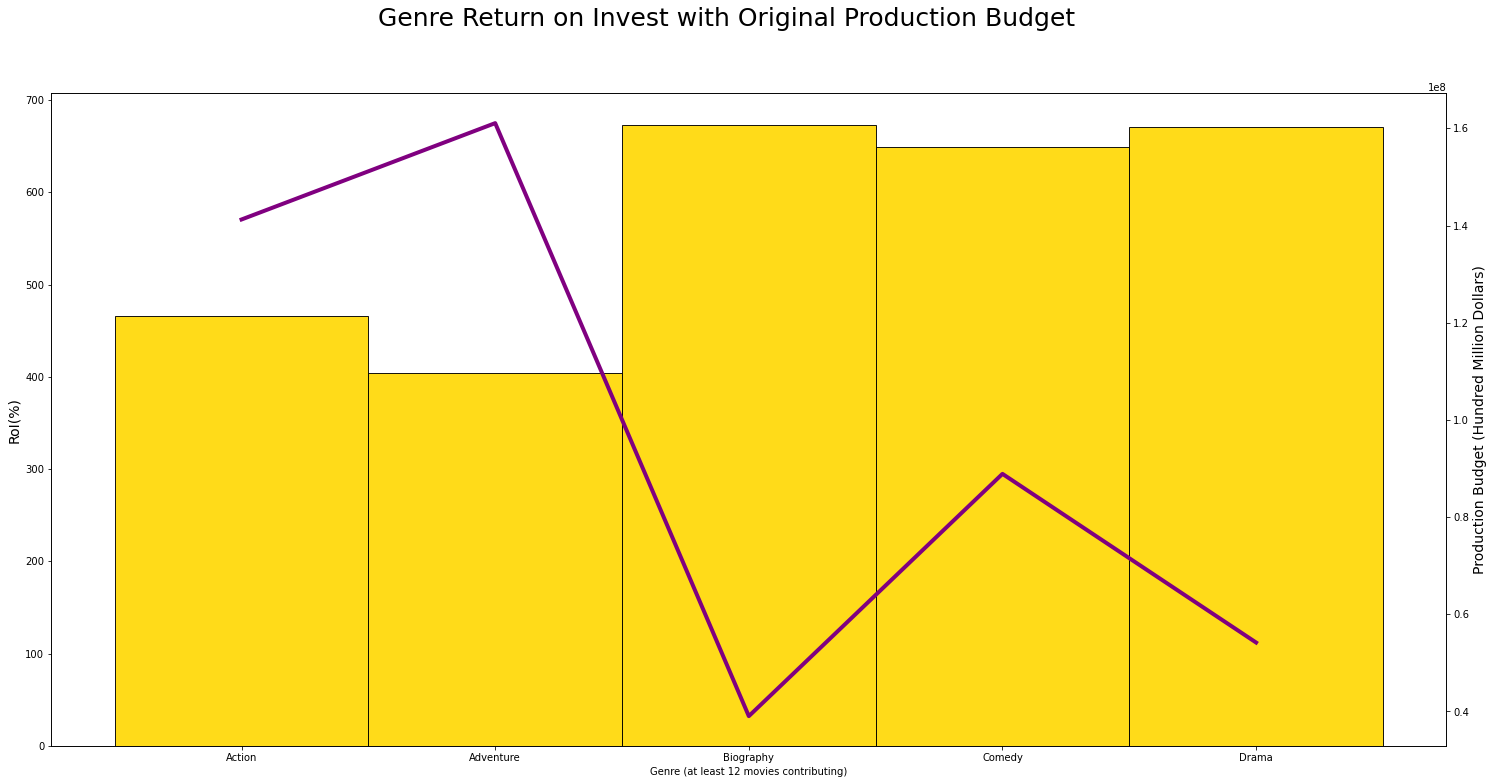

In [113]:
#Creating dual-y graph to depict RoI of each genre with the average original budget 
fig, ax1 = plt.subplots(figsize=(25, 12))
ax2 = ax1.twinx()

ax1.bar(genre_names, genre_values, color="gold", edgecolor="black", alpha=0.9, width=1.0)
ax2.plot(df_genre_budget, color="purple", lw=4)

ax1.set_xlabel("Genre (at least 12 movies contributing)")
ax1.set_ylabel("RoI(%)", fontsize=14)
ax1.tick_params(axis="y")


ax2.set_ylabel("Production Budget (Hundred Million Dollars)", fontsize=14)
ax2.tick_params(axis="y")


fig.suptitle("Genre Return on Invest with Original Production Budget", fontsize=25);

Ideally, the initial investment of any project should be lower than the profit. Action and Adventure movies require a higher production budget, or initial investment, that overshadows profit returns. Biographies, Comedies, and Dramas do not require as much financial backing to make, so the return is much higher. 

In [114]:
parent_profit = df_mojo_limited.groupby("parent_group")["total_profit"].mean()

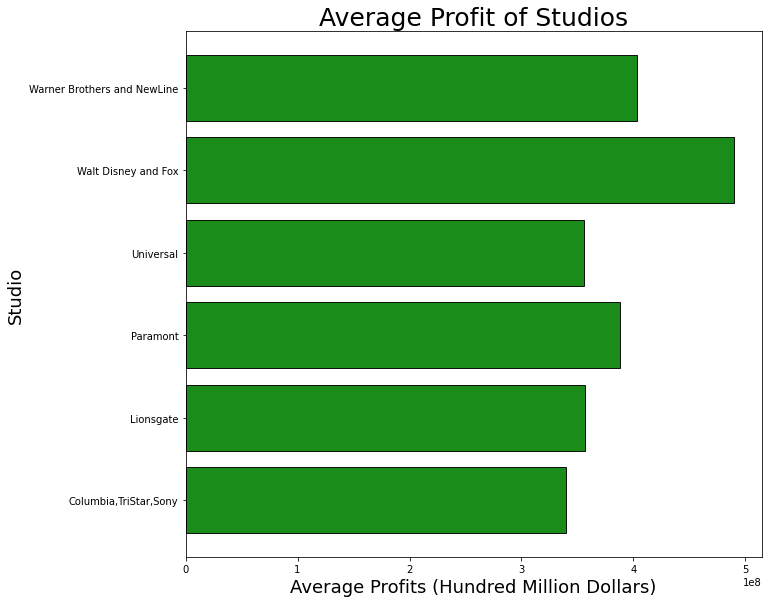

In [124]:
#The labels for average studio profit from BoxOffice Mojo
parent_profit_names = parent_profit.index
parent_profit_values = parent_profit.values

#Creating horizontal bar graph
fig, ax = plt.subplots(figsize=(20,10))
fig.subplots_adjust(bottom=0.15, left=0.5)

ax.barh(parent_profit.index,parent_profit.values, color='green', edgecolor='black', alpha=0.9)
ax.set_xlabel('Average Profits (Hundred Million Dollars)', fontsize=18)
ax.set_ylabel('Studio', fontsize=18)
ax.set_title("Average Profit of Studios", fontsize=25)


plt.show()

Based on the performance of studios who had movies with a domestic gross of at least $29,000,000 and a total profit of at least $139,000,000, we can see Walt Disney/Fox generated the highest average. When we dive further into the structure of this congolmerate, it becomes evident that their profits are brought in from numerous subsidiary companies. This strategy of acquiring smaller studios could provide a higher revenue for Microsoft than trying to start its own studio. Or, if Microsoft wanted to get bought out by one of the "Major Studios" above, they could still release movies under the name Microsoft Studios with split profit between themselves and the larger studio. Being an independent studio does come with its own autonomy;however, trying to compete against each of the studios listed above may prove challenging due to the hold they currently have over the industry. 

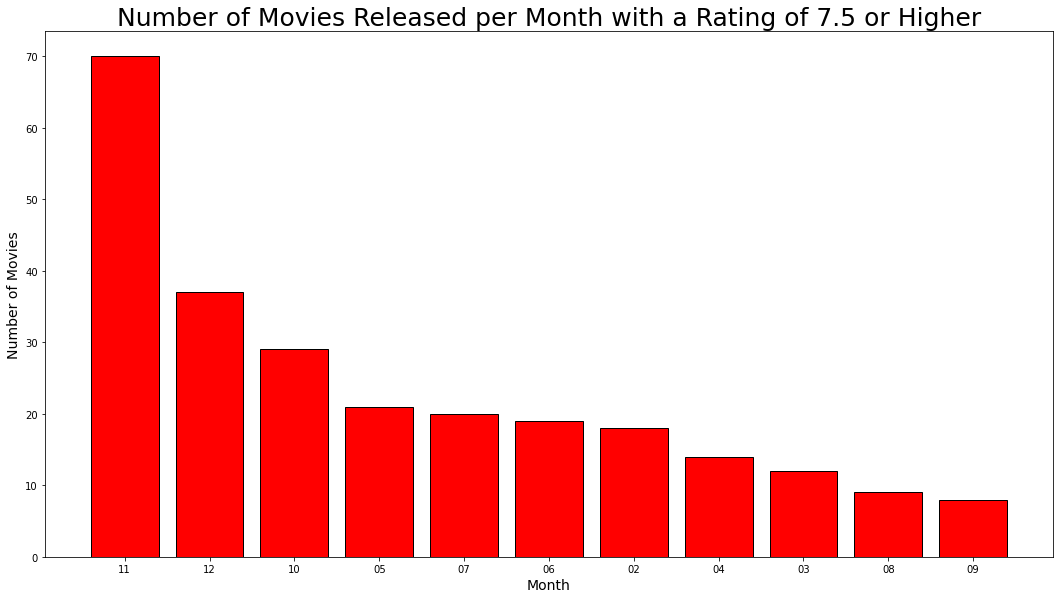

In [121]:
# Get the labels for the unique months and the value counts for each month
labels = monthly_counts.index
data = monthly_counts.values

# Create the bar graph
fig, ax = plt.subplots(figsize=(20,10))
fig.subplots_adjust(bottom=0.15, left=0.2)

#Add titles and axis details
ax.bar(monthly_counts.index,monthly_counts.values, color='red', edgecolor='black')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Movies', fontsize=14)
ax.set_title('Number of Movies Released per Month with a Rating of 7.5 or Higher', fontsize=25)

plt.show()

Ideally, projects Microsoft hopes to see the biggest return from should be released in the fall. Our top three months are November, December, and October, which aligns with a higher family outtings due to the holidays. We would not advice releasing films within the months of August or September as those months do not have as many high ranking films. 

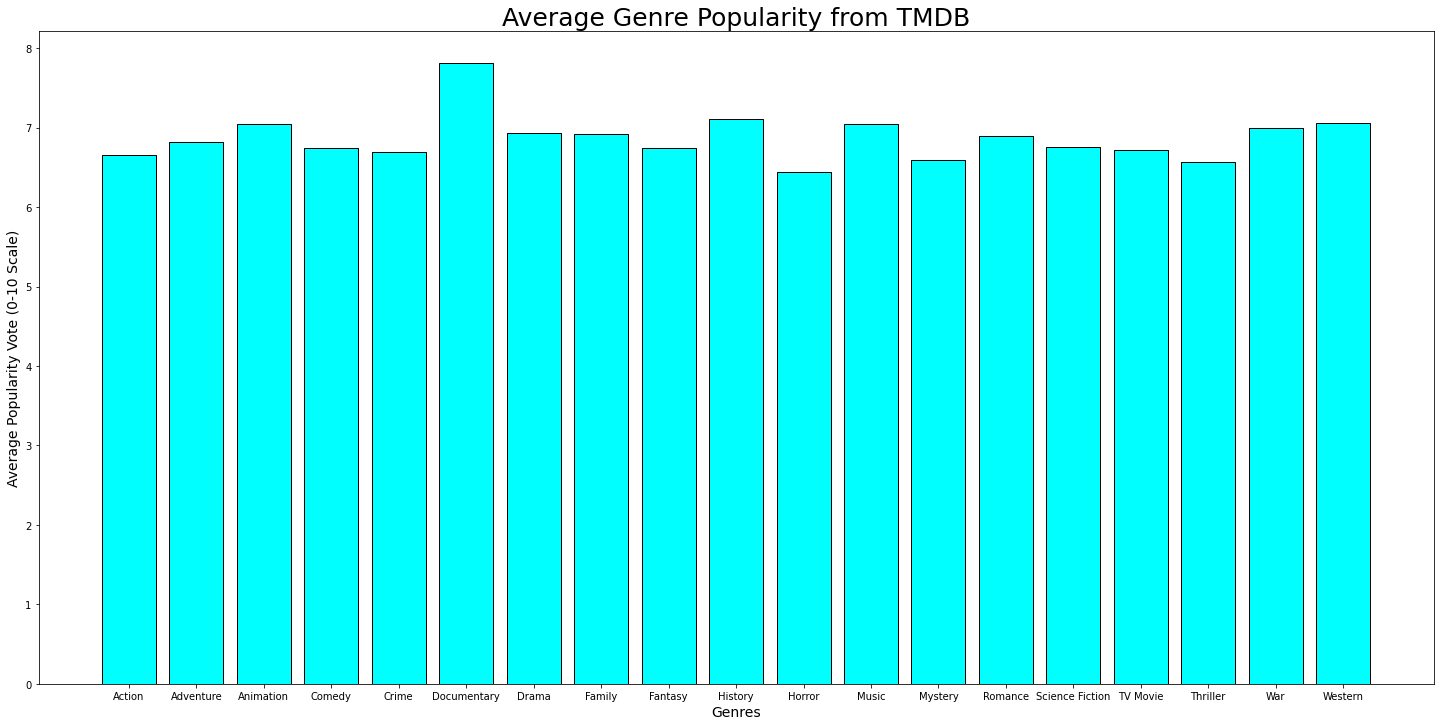

In [117]:
# Get the labels for the unique months and the value counts for each month
labels = genre_pop.index
data = genre_pop.values

# Create the bar graph
fig, ax = plt.subplots(figsize=(25,12))

#add titles and axis details
ax.bar(genre_pop.index,genre_pop.values, color='cyan', edgecolor='black')
ax.set_xlabel('Genres', fontsize=14)
ax.set_ylabel('Average Popularity Vote (0-10 Scale)', fontsize=14)
ax.set_title('Average Genre Popularity from TMDB', fontsize=25)


plt.show()

From the TMDb perspective, Documentary films seem to receive the highest popularity ranking; however, there isn't a definitive difference in audience popularity for each genre. This should not be taken into consideration for the business

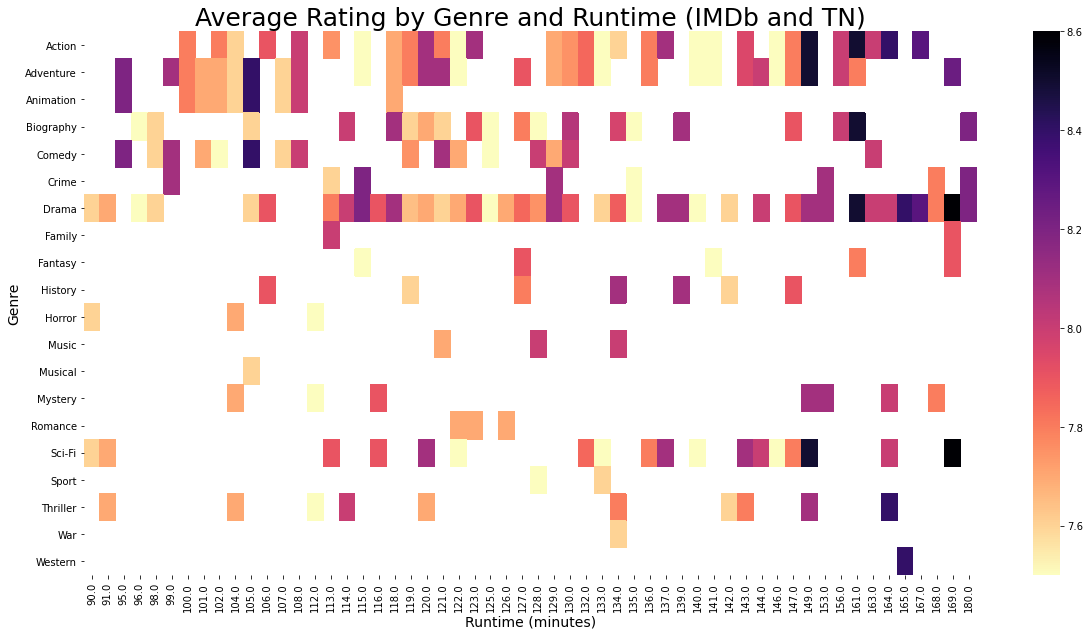

In [118]:
#Seaborn provides an easier method of creating heatmaps when coupled with matplotlib
import seaborn as sns

#Figure resized to better read
plt.figure(figsize=(20,10))

# Create a pivot table with genres as the index, runtime_minutes as the columns, and averagerating as the values
pivot_table = mass_df.pivot_table(index='genres', columns='runtime_minutes', values='averagerating')

# Use the heatmap function from seaborn to create the heatmap
sns.heatmap(pivot_table, cmap='magma_r')

# Add a title and axis labels
plt.title('Average Rating by Genre and Runtime (IMDb and TN)', fontsize=25)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Genre', fontsize=14)

plt.show()

If we were to focus on the five genres from the RoI graph, we can see that Dramas and Biographies tend to receive a higher ranting when their runtime is over two hours (120 minute). Action and Adventure see spikes in their ratings throughout with varying runtimes. Noticably, we can see above an 8.2 around 90 minutes, 105 minutes, 120 minute, 149 minutes, and 180 minutes. I would suggest taking a closer look at the distrbutors, writers, and directors of the films receiving those ratings to better understand how those ratings were acheived. Comedy should stay under two hours (120 minutes). If you were to venture out into other genres, we can see that films over two hours generally have a better rating. 

## Conclusion
Overall, paying attention to the strategy of the high-performing studios purchasing smaller studio has resulted booming profits. Microsoft opening their own studio will be costly, and they will be up against strong, established competition. My recommendation is to follow the lead of Walt Disney by starting research into studios with promising content who would be willing to come under a larger name with the promise of monetary help for production budgets. Drama, Comedy, and Biographies are the most cost-effective genres with low production budgets needed resulting in higher returns. Movies should be released in the fall, specifically November to maximize RoI. Audience popularity for some genres can be influenced by the length(runtime) of the movie. For comedies, it is recommended you stay within 1.5-1.7 hour window. Dramas and Biographies tend to be more favorable when they are at least 2 hours.

## Next Steps
Beginning research into purchasable studios of medium to high value for Microsoft to bring on under their entertainment name. Thi mirrors that steps taken by current competitors. Connecting high performing producers, directors, and writers to the above data for potential partnership decisions. MPAA ratings should also be taken into account for popularity and profit.